In [1]:
#Import libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import squarify as sq
from matplotlib.ticker import PercentFormatter
#from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

pd.set_option('display.max_columns', None)
#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df=pd.read_csv('listings.csv',low_memory=False)

In [3]:
#df.head()

In [4]:
#df.info()

In [5]:
#[{i:df[i].nunique()} for i in df.columns]

In [6]:
#[{i:df[i].nunique()} for i in df.columns]

## Notes

In [7]:
#df['name'][0]

In [8]:
#df['description'][0]

In [9]:
#df['neighborhood_overview'][0]

In [10]:
#df['picture_url'][0]

In [11]:
#list(df['room_type'].unique())

In [12]:
#len(list(df['instant_bookable'].dropna()))

In [13]:
#df[['minimum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm']]

In [14]:
#list(df['room_type'].unique())

In [15]:
#len(df[df['host_identity_verified']=='f'])

In [16]:
#df[df['minimum_nights']>=30]['minimum_nights'].count()

In [17]:
#df[df['has_availability']=='t']['has_availability'].count()

In [18]:
#df['calculated_host_listings_count']==df['host_total_listings_count']

------------

# Keeping the column names that are needed for the analysis

In [19]:
x=['id','host_id','host_since','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','latitude','longitude','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count','reviews_per_month']
df=df[x]
#df.head()

In [20]:
#df.info()

In [21]:
#df.describe()

# Cleaning some columns

In [22]:
#Datetime variables

df['first_review'] = pd.to_datetime(df["first_review"])
df['last_review'] = pd.to_datetime(df["last_review"])
df['host_since'] = pd.to_datetime(df["host_since"])

In [23]:
#Turning 't' & 'f' values to True and False

df['host_is_superhost']=df['host_is_superhost'].replace('t','True',regex=True)
df['host_is_superhost']=df['host_is_superhost'].replace('f','False',regex=True)
df['host_has_profile_pic']=df['host_has_profile_pic'].replace('t','True',regex=True)
df['host_has_profile_pic']=df['host_has_profile_pic'].replace('f','False',regex=True)
df['host_identity_verified']=df['host_identity_verified'].replace('t','True',regex=True)
df['host_identity_verified']=df['host_identity_verified'].replace('f','False',regex=True)
df['instant_bookable']=df['instant_bookable'].replace('t','True',regex=True)
df['instant_bookable']=df['instant_bookable'].replace('f','False',regex=True)

In [24]:
#Fixing price

df['price']=df['price'].str.replace('$','',regex=True)
df['price']=df['price'].str.replace(',','',regex=True)
df['price']=df['price'].apply(float)

In [25]:
#df['price'].sort_values(ascending=False).head()

In [26]:
#df['price'].sort_values(ascending=False).tail()

In [27]:
#Fixing the bathrooms_text column

def shared_bath(x):
    if ('shared' or 'Shared') in x:
        return True
    else:
        return False
    
df['bathrooms_count']=df['bathrooms_text'].str.replace(r'[^0-9.]','',regex=True)
df['bathrooms_count']=df['bathrooms_text'].str.extract('(\d+)')

df['shared_bath']=df['bathrooms_text'].astype(str).apply(shared_bath)

In [28]:
#Holding a new dataFrame

df1=df.copy()
df.head()

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,bathrooms_count,shared_bath
0,10595,37177,2009-09-08,Athens Quality Apartments is a company started...,within an hour,100%,98%,True,Ambelokipi,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,8,2 baths,3.0,5.0,"[""Dishwasher"", ""Crib"", ""Oven"", ""Hot water"", ""E...",51.0,1,28,4,2015-05-25,2019-04-04,4.81,4.89,4.82,4.89,4.86,4.57,4.75,True,6,0.38,2,False
1,10990,37177,2009-09-08,Athens Quality Apartments is a company started...,within an hour,100%,98%,True,Ambelokipi,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1 bath,1.0,1.0,"[""Oven"", ""Hot water"", ""Extra pillows and blank...",46.0,1,48,15,2015-11-25,2016-02-22,4.85,4.94,4.92,4.89,4.92,4.83,4.81,True,6,0.70,1,False
2,10993,37177,2009-09-08,Athens Quality Apartments is a company started...,within an hour,100%,98%,True,Ambelokipi,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Extra pillows and blankets"", ""I...",36.0,1,63,15,2015-10-18,2018-03-31,4.83,4.92,4.94,4.97,4.97,4.84,4.82,True,6,0.91,1,False
3,10995,37177,2009-09-08,Athens Quality Apartments is a company started...,within an hour,100%,98%,True,Ambelokipi,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1 bath,1.0,2.0,"[""Oven"", ""Hot water"", ""Extra pillows and blank...",38.0,1,24,3,2015-12-05,2016-08-06,4.79,4.95,4.91,4.91,4.87,4.77,4.77,True,6,0.35,1,False
4,27262,37177,2009-09-08,Athens Quality Apartments is a company started...,within an hour,100%,98%,True,Ambelokipi,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,4,1 bath,1.0,1.0,"[""Dishwasher"", ""Crib"", ""Oven"", ""Hot water"", ""E...",38.0,1,17,0,2015-11-12,2017-05-15,4.76,4.81,4.94,4.94,5.00,4.69,4.63,True,6,0.25,1,False


# Creating Host DataFrame

In [64]:
#Making the rating for the host
df['host_rating']=(df['review_scores_rating']+df['review_scores_accuracy']+df['review_scores_cleanliness']+df['review_scores_checkin']+df['review_scores_communication']+df['review_scores_location']+df['review_scores_value'])/7

#columns for the host DataFrame
host_char=['host_id','host_about','number_of_reviews','first_review','last_review','calculated_host_listings_count','host_is_superhost','host_response_time','host_response_rate','host_acceptance_rate','host_has_profile_pic','id','host_identity_verified','host_verifications','host_rating']
df_host=df[host_char]
df_host

# We create a new column for weighted_score, the number of reviews play a significatnt role

df_host["weighted_rating"] = df_host["host_rating"] * df_host["number_of_reviews"]

# Then we create the normalized score
df_host["normalized_weighted_rating"] = (df_host["weighted_rating"] - df_host["weighted_rating"].min()) \
                                                / (df_host["weighted_rating"].max() - df_host["weighted_rating"].min()) * 100
df_host.sort_values('normalized_weighted_rating', ascending=False, inplace=True)

In [65]:
df_host.head()

,host_id,host_about,number_of_reviews,first_review,last_review,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,id,host_identity_verified,host_verifications,host_rating,weighted_rating,normalized_weighted_rating
135,6442400,"Hi, I'm Rio, I was born in Scotland, Edinburg...",721,2013-06-26,2020-01-01,1,False,within an hour,100%,100%,True,1177492,True,"['email', 'phone', 'reviews', 'jumio', 'offlin...",4.827143,3480.370000,100.000000
272,14538849,Cool and reasonable,620,2014-07-07,2021-06-23,3,True,within an hour,100%,100%,True,3431705,True,"['email', 'phone', 'reviews', 'offline_governm...",4.864286,3015.857143,86.649512
171,7943398,Hello:)\r\nWe are a couple with two gorgeous d...,559,2013-08-14,2020-03-20,2,True,within an hour,100%,100%,True,1484797,False,"['email', 'phone', 'reviews', 'jumio', 'govern...",4.904286,2741.495714,78.764136
1039,78047615,NaN,551,2016-07-15,2021-06-02,1,True,within an hour,100%,100%,True,13553080,True,"['email', 'phone', 'facebook', 'reviews', 'off...",4.892857,2695.964286,77.455525
369,6515798,I am Athanasios and \nworking as interior desi...,544,2015-04-19,2021-06-25,3,True,within an hour,100%,100%,True,5025556,True,"['email', 'phone', 'google', 'reviews', 'jumio...",4.898571,2664.822857,76.560494


In [66]:
#df_host.info()

## Cleaning the first/last review dates in host DataFrame 

In [67]:
df_host['active_days_of_rating'] = (df_host['last_review'] - df_host['first_review']).dt.days
df_host.drop(columns = ['last_review','first_review'], inplace= True)
df_host['active_days_of_rating'].unique()

array([2380., 2543., 2410., ..., -211.,    0.,   nan])

In [68]:
#df_host.head()

## Counting the elements of the host_verifications column

In [93]:
def verification_len(x):
    try:
        return len(eval(x))
    except:
        pass

df_host['number_of_verifications']= df_host['host_verifications'].apply(verification_len)
#eval(df_host['host_verifications'][135])
               
df_host

,host_id,host_about,number_of_reviews,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,id,host_identity_verified,host_verifications,host_rating,weighted_rating,normalized_weighted_rating,active_days_of_rating,number_of_verifications
135,6442400,"Hi, I'm Rio, I was born in Scotland, Edinburg...",721,1,False,within an hour,100%,100%,True,1177492,True,"['email', 'phone', 'reviews', 'jumio', 'offlin...",4.827143,3480.370000,100.000000,2380.0,6.0
272,14538849,Cool and reasonable,620,3,True,within an hour,100%,100%,True,3431705,True,"['email', 'phone', 'reviews', 'offline_governm...",4.864286,3015.857143,86.649512,2543.0,7.0
171,7943398,Hello:)\r\nWe are a couple with two gorgeous d...,559,2,True,within an hour,100%,100%,True,1484797,False,"['email', 'phone', 'reviews', 'jumio', 'govern...",4.904286,2741.495714,78.764136,2410.0,5.0
1039,78047615,NaN,551,1,True,within an hour,100%,100%,True,13553080,True,"['email', 'phone', 'facebook', 'reviews', 'off...",4.892857,2695.964286,77.455525,1783.0,6.0
369,6515798,I am Athanasios and \nworking as interior desi...,544,3,True,within an hour,100%,100%,True,5025556,True,"['email', 'phone', 'google', 'reviews', 'jumio...",4.898571,2664.822857,76.560494,2259.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9579,231387850,NaN,0,15,False,within an hour,100%,99%,True,50607609,True,"['email', 'phone', 'offline_government_id', 'g...",NaN,NaN,NaN,NaN,4.0
9580,187720552,"I have studied design, literature and theatre ...",0,36,False,within an hour,94%,91%,True,50614830,True,"['email', 'phone', 'offline_government_id', 'g...",NaN,NaN,NaN,NaN,4.0
9581,309145409,I have studied business administration.\nI lov...,0,4,True,within an hour,100%,99%,True,50625124,False,"['email', 'phone', 'work_email']",NaN,NaN,NaN,NaN,3.0
9582,92310506,NaN,0,28,True,within an hour,100%,92%,True,50638614,True,"['email', 'phone', 'reviews', 'jumio', 'offlin...",NaN,NaN,NaN,NaN,8.0


## Tryouts

In [105]:
df10=df_host.groupby(by='host_id').agg({'host_rating': np.mean,'number_of_verifications': np.average, 'id': 'count'}).reset_index()
df10['new_number_of_verifications']=df10['number_of_verifications']/df10['number_of_verifications'].max()
df10

,host_id,host_rating,number_of_verifications,id,new_number_of_verifications
0,37177,4.865238,5.0,6,0.454545
1,70840,4.795714,3.0,1,0.272727
2,102433,NaN,8.0,1,0.727273
3,121318,4.892143,7.0,2,0.636364
4,133000,4.903333,8.0,8,0.727273
...,...,...,...,...,...
4925,407726365,NaN,1.0,1,0.090909
4926,407774880,5.000000,1.0,1,0.090909
4927,408126357,NaN,2.0,1,0.181818
4928,408298243,NaN,1.0,1,0.090909


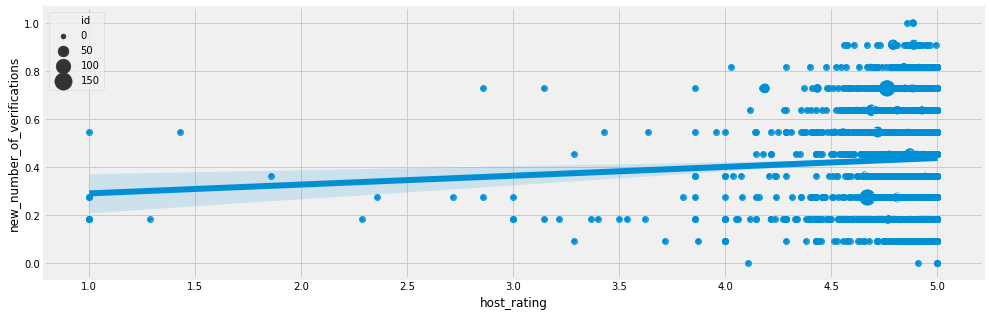

In [106]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df10, x = 'host_rating', y = 'new_number_of_verifications', size='id', hue_norm= (0,7), sizes=(25, 300))
sns.regplot(data = df10, x = 'host_rating', y = 'new_number_of_verifications')

## Fixing the percentages in the two columns of host DataFrame

In [33]:
df_host['host_response_rate']=df_host['host_response_rate'].replace('%','',regex=True).astype(float)
df_host['host_acceptance_rate']=df_host['host_acceptance_rate'].replace('%','',regex=True).astype(float)


In [99]:
df_host1= df_host.groupby('host_id').agg({'host_rating': np.mean, 'active_days_of_rating': np.sum,'calculated_host_listings_count': np.sum,'host_about': 'count'}).reset_index().sort_values('host_about', ascending= False)
#df_host1.head(20)

In [98]:
#df_host.info()

## Plotting to see the relationship between verified, response rate & superhost

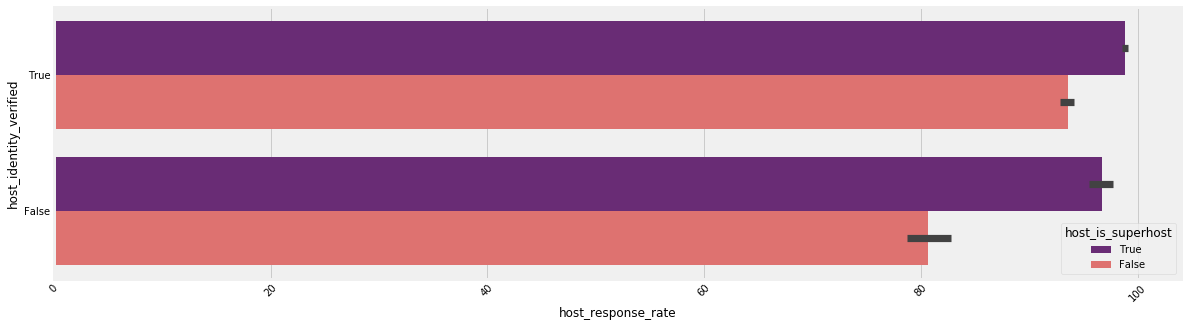

In [51]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='host_response_rate', y = 'host_identity_verified', hue='host_is_superhost', palette = "magma", data=df_host)
plt.setp(ax.get_xticklabels(), rotation=45)
None

In [42]:
df_host

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         9584 non-null   int64  
 1   host_about                      5405 non-null   object 
 2   number_of_reviews               9584 non-null   int64  
 3   calculated_host_listings_count  9584 non-null   int64  
 4   host_is_superhost               9572 non-null   object 
 5   host_response_time              7558 non-null   object 
 6   host_response_rate              7558 non-null   object 
 7   host_acceptance_rate            7425 non-null   object 
 8   host_has_profile_pic            9572 non-null   object 
 9   host_identity_verified          9572 non-null   object 
 10  host_verifications              9584 non-null   object 
 11  host_rating                     7297 non-null   float64
 12  active_days_of_rating           73

# See how some slices affect the shape of DataFrame

In [30]:


print(df.shape)
df = df[df['price'] > 0]
print(df.shape)
df = df[df['reviews_per_month'] > 0]
print(df.shape)
df = df[df['bedrooms'] > 0]
print(df.shape)
df = df[df['beds'] > 0]
print(df.shape)
df = df[df['accommodates'] > 0]
print(df.shape)
df = df[df['review_scores_rating'] > 0]
print(df.shape)

(9584, 40)
(9584, 40)
(7339, 40)
(6684, 40)
(6569, 40)
(6569, 40)
(6533, 40)


In [31]:
# We create a new column for weighted_score, the number of reviews play a significatnt role

df["weighted_rating"] = df["review_scores_rating"] * df["number_of_reviews"]

# Then we create the normalized score
df["normalized_weighted_rating"] = (df["weighted_rating"] - df["weighted_rating"].min()) \
                                                / (df["weighted_rating"].max() - df["weighted_rating"].min()) * 100

df.sort_values('normalized_weighted_rating', ascending=False, inplace=True)

# Tryouts

In [421]:
nhood=df.groupby('neighbourhood_cleansed').agg({'id':pd.Series.nunique,'price':np.average,'minimum_nights':np.average,'number_of_reviews':np.sum}).reset_index()
nhood['total_earnings']=nhood['minimum_nights']*nhood['number_of_reviews']*nhood['price']/nhood['id']
nhood.sort_values(by='total_earnings',ascending=False,inplace=True)

In [422]:
nhood.head()

,neighbourhood_cleansed,id,price,minimum_nights,number_of_reviews,total_earnings
17,ΘΗΣΕΙΟ,207,83.473430,6.792271,15738,43106.467032
9,ΒΟΤΑΝΙΚΟΣ,53,222.226415,2.283019,2622,25099.322501
16,ΖΑΠΠΕΙΟ,90,186.811111,1.577778,7484,24509.802283
10,ΓΚΑΖΙ,57,97.754386,1.964912,4547,15322.496034
34,ΠΕΤΡΑΛΩΝΑ,163,58.815951,5.484663,7099,14049.297505


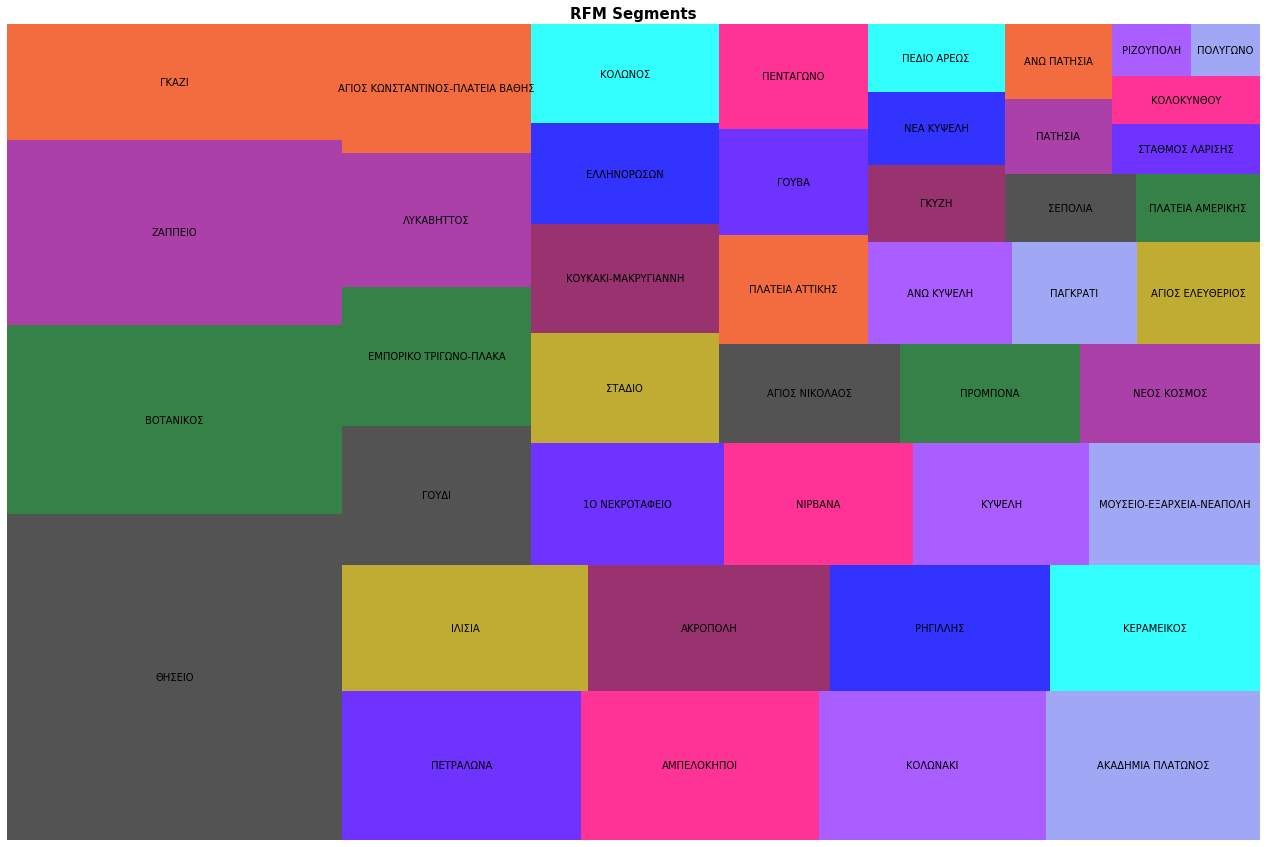

In [423]:
# Plot Segments in a Treemap


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 15)
sq.plot(sizes=nhood["total_earnings"], 
                      label=nhood['neighbourhood_cleansed'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=15, fontweight="bold")
plt.axis('off')
plt.show()